In [13]:
# exploration analysis
import numpy as np
import pandas as pd
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.graph_objects as go
sns.set_theme(style="whitegrid")
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

# statistic
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Suppress the specific FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Here are the questions I tried to answer:
- **Is there discremination based on sex, ethnicity, etc. when hiring/promoting employee.**
- **How does the rating work**
- **When an employ can expect to be promoted.**

### The main outputs are:
- **There is an issue with the varibale EmployeeID, some employee were rated years before being hired.**
- **There is no discrimination between woman and man, or between different ethnic (exepeted maybe toward Latinos in CA)**
- **The parameters influenceing promotion are:**
    - **salary**, 
    - **distance from home**,
    - **age**,
    - **and year with the company and manager.**
- **When an employ can expect to be promoted. It is difficult to answer tis question due to the issue with EmployeeID, and because only the last promotion is repported.**

[1: Load and clean the data](#1)

[2: Exploratory Data Analysis](#2)
- [2.1: Who are the employees?](#2)
- [2.2: When are performed the performance reviews?](#2.2)
- [2.3: What think the emloyees of their reviews?](#2.3)
- [2.4: What are the factors influncing the performance](#2.4)
    - [2.4.1: Model selection](#2.4.1)
    - [2.4.2 : Feature importance](#2.4.2)
- [2.5: Who is promoted?](#2.5)
    - [2.5.1: Sankey Diagram](#2.5)


## <a id="1"></a>
<div style="
           border-radius:50px;
           background-color:#7ca4cd;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:white;
          text-align:center;">1: Load and clean the data
</p>

### Dataframe 1. "Performance Rating"

- **PerformanceID**: Unique identifier for each performance review.
- **EmployeeID**: Unique identifier for the employee being reviewed.
- **ReviewDate**: The date of the performance review.
- **EnvironmentSatisfaction**: Rating of the employee's satisfaction with their work environment.
- **JobSatisfaction**: Rating of the employee's satisfaction with their job.
- **RelationshipSatisfaction**: Rating of the employee's satisfaction with workplace relationships.
- **TrainingOpportunitiesWithinYear**: Number of training opportunities available to the employee within the year.
- **TrainingOpportunitiesTaken**: Number of training opportunities the employee has taken.
- **WorkLifeBalance**: Rating of the employee's work-life balance.
- **SelfRating**: The employee's self-assessment rating.
- **ManagerRating**: The manager's rating of the employee's performance.

In [15]:
df_performance = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/PerformanceRating.csv")
print(df_performance.shape)
df_performance.head(12)

(6709, 11)


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3
5,PR06,F93E-BDEF,1/4/2013,3,3,2,2,0,4,4,4
6,PR07,9E7A-1F70,1/8/2013,3,4,5,2,1,5,4,3
7,PR08,05ED-92F1,1/10/2013,4,5,4,1,1,3,3,2
8,PR09,F72D-261D,1/10/2013,4,5,2,1,1,4,5,4
9,PR10,774E-685D,1/11/2013,5,4,3,2,3,4,5,4


**Here, I displayed enough row to see the format of the date, it is Month/Day/Year**

In [3]:
# check basic info
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [17]:
# let's convert 'ReviewDate' ino a date (as it can be seen above the format is M/D/Y)
df_performance['ReviewDate'] = pd.to_datetime(df_performance['ReviewDate'], format='%m/%d/%Y')

In [16]:
#check for missing value
df_performance.isnull().sum() 

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

In [18]:
#check for duplicate
df_performance.duplicated().sum()

np.int64(0)

### Dataframe2: Employee

- **EmployeeID**: Unique identifier for each employee.
- **FirstName**: The first name of the employee.
- **LastName**: The last name of the employee.
- **Gender**: The gender of the employee.
- **Age**: The age of the employee.
- **BusinessTravel**: The frequency of business travel for the employee.
- **Department**: The department in which the employee works.
- **DistanceFromHome (KM)**: The distance between the employee's home and workplace in kilometers.
- **State**: The state in which the employee resides.
- **Ethnicity**: The ethnicity of the employee.
- **MaritalStatus**: The marital status of the employee.
- **Salary**: The annual salary of the employee.
- **StockOptionLevel**: The level of stock options granted to the employee.
- **OverTime**: Whether the employee works overtime (Yes/No).
- **HireDate**: The date the employee was hired.
- **Attrition**: Whether the employee has left the company (Yes/No).
- **YearsAtCompany**: The number of years the employee has been with the company.
- **YearsInMostRecentRole**: The number of years the employee has been in their most recent role.
- **YearsSinceLastPromotion**: The number of years since the employee's last promotion.
- **YearsWithCurrManager**: The number of years the employee has worked with their current manager.

In [20]:
df_employee = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/Employee.csv")
print(df_employee.shape)
df_employee.tail(2)

(1470, 23)


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0
1469,84D4-D4C3,Naoma,Hebbard,Female,20,No Travel,Technology,28,CA,Black or African American,...,Married,38258,0,No,2022-12-31,No,0,0,0,0


**Comments:**

**In the file description 20 columns were presented but here there are 23 columns. What are the 3 dolumns not presented?**  

after comparison the 3 missing columns are:
- **'Education'**,
- **'EducationField'**
- **'JobRole'**

**There are 6709 reviews for 1470 employees. So employees were reviewed several times over the years.**

Years in most recent role is different of years since last promotion. So, promotion must be a salary increase, not a move toward a higher position in the company.

In [8]:
# check basic info
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [21]:
# let's convert 'ReviewDate' ino a date (as it can be seen above the format is M/D/Y)
df_employee['HireDate'] = pd.to_datetime(df_employee['HireDate'], format='%Y-%m-%d')

In [22]:
#check for missing value
df_employee.isnull().sum() 

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [23]:
#check for duplicate
df_employee.duplicated().sum()

np.int64(0)

In [24]:
# convert object data to category
list_category =['Gender','BusinessTravel', 'Department','State','Ethnicity', 'Education',
                'EducationField','JobRole', 'MaritalStatus','OverTime', 'Attrition']
for col in list_category:
    df_employee[col] = df_employee[col].astype('category')

In [25]:
# check uniqueness
for col in list_category:
    print('-'*30)
    print(col)
    print(df_employee[col].unique())

------------------------------
Gender
['Female', 'Male', 'Non-Binary', 'Prefer Not To Say']
Categories (4, object): ['Female', 'Male', 'Non-Binary', 'Prefer Not To Say']
------------------------------
BusinessTravel
['Some Travel', 'No Travel ', 'Frequent Traveller']
Categories (3, object): ['Frequent Traveller', 'No Travel ', 'Some Travel']
------------------------------
Department
['Sales', 'Human Resources', 'Technology']
Categories (3, object): ['Human Resources', 'Sales', 'Technology']
------------------------------
State
['IL', 'CA', 'NY']
Categories (3, object): ['CA', 'IL', 'NY']
------------------------------
Ethnicity
['White', 'Asian or Asian American', 'Mixed or multiple ethnic groups', 'Black or African American', 'Native Hawaiian ', 'Other ', 'American Indian or Alaska Native']
Categories (7, object): ['American Indian or Alaska Native', 'Asian or Asian American', 'Black or African American', 'Mixed or multiple ethnic groups', 'Native Hawaiian ', 'Other ', 'White']
------

In [35]:
df_employee['Ethnicity'].unique()

['White', 'Asian', 'Mixed', 'Black', 'Native Hawaiian ', 'Other ', 'Native Americain']
Categories (7, object): ['Native Americain', 'Asian', 'Black', 'Mixed', 'Native Hawaiian ', 'Other ', 'White']

In [36]:
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Asian or Asian American', 'Asian')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Mixed or multiple ethnic groups', 'Mixed')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Black or African American', 'Black')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('American Indian or Alaska Native', 'Native Americain')

In [37]:
list_job = df_employee['JobRole'].unique()
for job in list_job:
    print(job)

Sales Executive
HR Business Partner
Engineering Manager
Recruiter
Data Scientist
Machine Learning Engineer
Manager
Software Engineer
Senior Software Engineer
Sales Representative
Analytics Manager
HR Executive
HR Manager


**General observations:**

- In EducationField: there are 'Marketing' and 'Marketing ' (with an empty space)

- OverTime and Attrition could be convertes to boolean type if wanted..

In [30]:
df_employee['EducationField'] = df_employee['EducationField'].replace('Marketing ', 'Marketing')

### Dataframe3: SatisfiedLevel

- **SatisfactionID**: Unique identifier for the satisfaction level.
- **SatisfactionLevel**: The level of satisfaction, ranging from "Very Dissatisfied" to "Very Satisfied."

In [32]:
df_satisfaction = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/SatisfiedLevel.csv")
print(df_satisfaction.shape)
df_satisfaction.head(5)

(5, 2)


,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


### Dataframe4: RatingLevel

- **RatingID**: Unique identifier for the rating level.
- **RatingLevel**: The performance rating, ranging from "Unacceptable" to "Above and Beyond."

In [33]:
df_rating = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/RatingLevel.csv")
print(df_rating.shape)
df_rating.head(5)

(5, 2)


,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


### Dataframe5: EducationLevel

- **EducationLevelID**: Unique identifier for the education level.
- **EducationLevel**: The level of education achieved, ranging from "No Formal Qualifications" to "Doctorate."

In [34]:
df_education = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/EducationLevel.csv")
print(df_education.shape)
df_education.head(5)

(5, 2)


,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


**let's replace the eductaional level in the employee database**

In [21]:
df_employee['Education'] = df_employee['Education'].replace(1, 'No qualifications')
df_employee['Education'] = df_employee['Education'].replace(2, 'High School')
df_employee['Education'] = df_employee['Education'].replace(3, 'Bachelors')
df_employee['Education'] = df_employee['Education'].replace(4, 'Masters')
df_employee['Education'] = df_employee['Education'].replace(5, 'Doctorate')

### Merge Dataframe: Employee and Performace
 let's merge the two dataframe to verify if nothing wrong:

In [22]:
df_merged = pd.merge(df_performance,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
print(df_merged.shape)
df_merged.head(5)

(6709, 33)


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1


**There is an issue, some employees had a performance review years before being hired!!!**

In [23]:
# just to double check
df_test=df_employee[df_employee['EmployeeID']=='2FC6-7ED5']
df_test

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
863,2FC6-7ED5,Deena,Deegan,Female,44,Frequent Traveller,Technology,29,CA,Mixed,...,Married,303779,1,No,2018-08-24,No,4,0,0,0


In [24]:
df_test=df_performance[df_performance['EmployeeID']=='2FC6-7ED5']
df_test

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
1996,PR279,2FC6-7ED5,2014-04-07,4,2,2,2,3,2,4,3
5537,PR598,2FC6-7ED5,2015-04-07,3,5,5,1,0,4,4,4
6698,PR99,2FC6-7ED5,2013-04-07,4,2,4,3,1,4,5,4


### let's assume that all employee having a review before being hired are old employee, and that the EmployeeID is wrong 

In [25]:
# Select and update rows where 'col1' is less than 'col2'
df_merged.loc[df_merged['ReviewDate'] < df_merged['HireDate'], 'EmployeeID'] = 'wrongID'
df_merged.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,wrongID,2013-01-02,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR02,wrongID,2013-01-03,5,4,4,1,3,4,4,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,PR03,wrongID,2013-01-03,3,4,5,3,2,3,5,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
3,PR04,wrongID,2013-01-04,5,3,2,2,0,2,3,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
4,PR05,wrongID,2013-01-04,5,2,3,1,0,4,4,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1


In [26]:
len(df_merged['EmployeeID'].unique())

1218

## After a quick look at the type of variable here are the questions we can try to answer:
- **Is there dicremination based on sex, ethnicity, etc. when promoting employee.**
- **How does the rating work**
- **When an employ can expect to be promoted.**

## <a id="2"></a>
<div style="
           border-radius:50px;
           background-color:#7ca4cd;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:white;
          text-align:center;">2: EDA
</p>

## <a id="2.1"></a>
## 2.1: Who are the employees?

In [27]:
df_male = df_employee[df_employee['Gender']=='Male']
df_female = df_employee[df_employee['Gender']=='Female']
df_bi = df_employee[df_employee['Gender']=='Non_binary']

df_male_female = pd.concat([df_male,df_female])

In [28]:
def create_pie_plot_from_column(ax, df, column, colors=None, title=None, title_color="black", 
                                show_labels=True, show_legend=True, x_leg=0, y_leg=0, 
                                with_leader_lines=False, y_offset=0.05, max_distance=0.5):
   
    # Calculate the percentage distribution of each category
    data = df[column].value_counts()
    sizes = data.values
    total = sum(sizes)

    # Create the pie plot with percentage display
    wedges, texts = ax.pie(
        sizes,
        labels=None,  # Do not display labels in the pie chart itself
        colors=colors,
        startangle=-40,
        wedgeprops=dict(width=0.5)  # Adjust the width of the wedges
    )

    # Equal aspect ratio ensures that the pie is drawn as a circle.
    ax.axis('equal')

    # Set the title if provided, with the specified title color
    if title:
        ax.set_title(title, color=title_color,fontweight='bold')

    # Show legend in the upper right if specified
    if show_legend:
        ax.legend(wedges, data.index, title=column, loc="upper right", bbox_to_anchor=(x_leg, y_leg))

    # Manually add labels and leader lines if specified, otherwise add percentages inside the donut
    if with_leader_lines:
        kw = dict(arrowprops=dict(arrowstyle="-", color='black', lw=0.75),  # Ensure the line is visible
                  zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1) / 2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})

            # Calculate the adjusted annotation position
            distance = max_distance
            adjusted_x = x * (1 + distance)
            adjusted_y = y * (1 + distance) + (y_offset * i)

            # Calculate the percentage
            percentage_text = f'{sizes[i] / total * 100:.1f}%'

            # Annotate with the percentage only, no box around the text
            ax.annotate(percentage_text,
                        xy=(x, y), xytext=(adjusted_x, adjusted_y),
                        horizontalalignment=horizontalalignment, **kw)
    else:
        # Display percentages inside the donut slices by default
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1) / 2. + p.theta1
            y = np.sin(np.deg2rad(ang)) * 0.7  # Adjust for placement inside the donut
            x = np.cos(np.deg2rad(ang)) * 0.7  # Adjust for placement inside the donut
            percentage_text = f'{sizes[i] / total * 100:.1f}%'
            
            # Annotate with the percentage inside the donut slice
            ax.annotate(percentage_text,
                        xy=(x, y), xytext=(x, y),
                        horizontalalignment="center", verticalalignment="center", fontsize=10)

    # Return the Axes object
    return ax


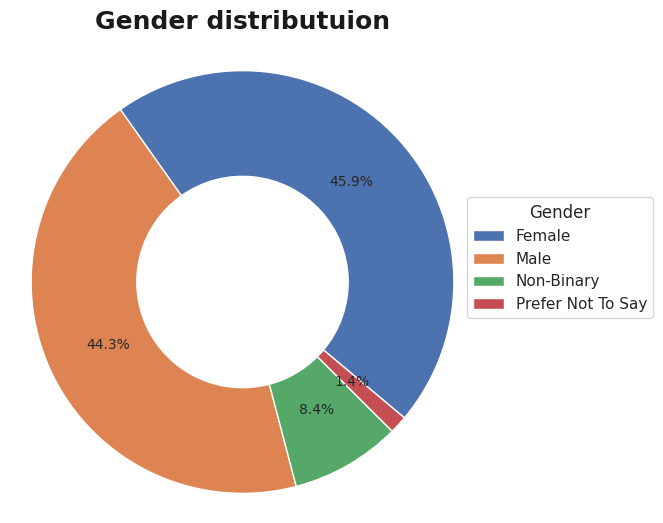

In [29]:
# Create a figure with subplots
fig, axs = plt.subplots(figsize=(6, 6))

# Use the function to create pie plots
create_pie_plot_from_column(axs, df_employee, 'Gender', title='Gender distribution',title_color="darkblue",
                            show_labels=False, show_legend=True,x_leg=1.4, y_leg=0.7, with_leader_lines=False)
plt.title('Gender distributuion', y= 1.03,ha='center', fontsize=18, fontweight='bold',color="k")
plt.show()


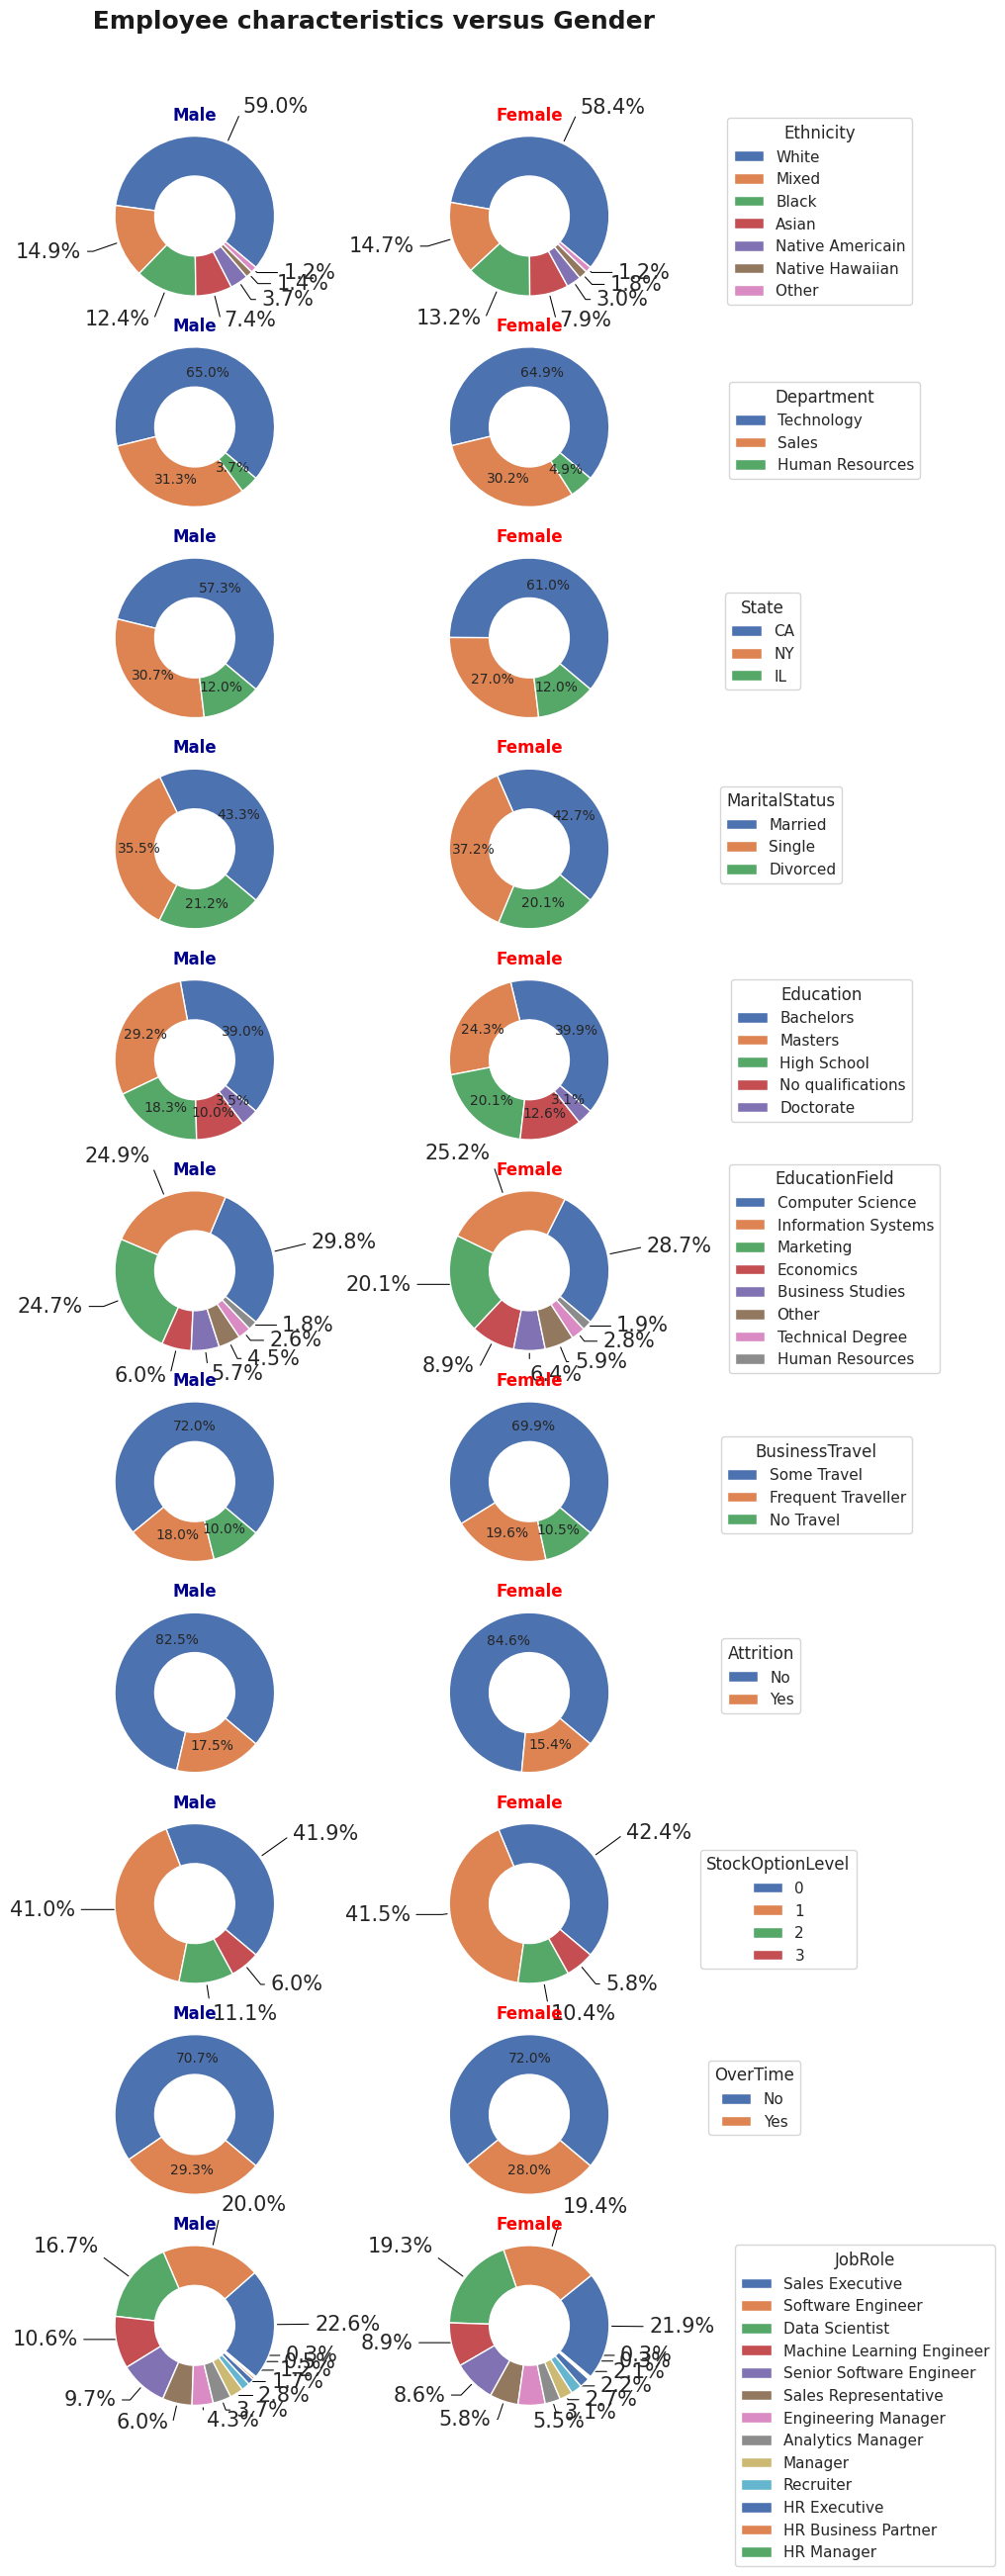

In [30]:
fig, axs = plt.subplots(11,2, figsize=(8,30))
plt.suptitle('     Employee characteristics versus Gender', ha='center', fontsize=18, fontweight='bold',color="k",y=0.92)
create_pie_plot_from_column(axs[0,0], df_male, 'Ethnicity', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=True)
create_pie_plot_from_column(axs[0,1], df_female, 'Ethnicity', title='Female',title_color="red", show_labels=False,show_legend=True,x_leg=1.9, y_leg=1.1, with_leader_lines=True)
create_pie_plot_from_column(axs[1,0], df_male, 'Department', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[1,1], df_female, 'Department', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.93, y_leg=0.8, with_leader_lines=False)
create_pie_plot_from_column(axs[2,0], df_male, 'State', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[2,1], df_female, 'State', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.5, y_leg=0.8, with_leader_lines=False)
create_pie_plot_from_column(axs[3,0], df_male, 'MaritalStatus', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[3,1], df_female, 'MaritalStatus', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.65, y_leg=0.9, with_leader_lines=False)
create_pie_plot_from_column(axs[4,0], df_male, 'Education', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[4,1], df_female, 'Education', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.9, y_leg=1, with_leader_lines=False)
create_pie_plot_from_column(axs[5,0], df_male, 'EducationField', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=True)
create_pie_plot_from_column(axs[5,1], df_female, 'EducationField', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=2.0, y_leg=1.15, with_leader_lines=True)
create_pie_plot_from_column(axs[6,0], df_male, 'BusinessTravel', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[6,1], df_female, 'BusinessTravel', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.9, y_leg=0.8, with_leader_lines=False)
create_pie_plot_from_column(axs[7,0], df_male, 'Attrition', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=False)
create_pie_plot_from_column(axs[7,1], df_female, 'Attrition', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.5, y_leg=0.85,with_leader_lines=False)
create_pie_plot_from_column(axs[8,0], df_male, 'StockOptionLevel', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=True)
create_pie_plot_from_column(axs[8,1], df_female, 'StockOptionLevel', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.7, y_leg=0.85,with_leader_lines=True)
create_pie_plot_from_column(axs[9,0], df_male, 'OverTime', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=False)
create_pie_plot_from_column(axs[9,1], df_female, 'OverTime', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.5, y_leg=0.85,with_leader_lines=False)
create_pie_plot_from_column(axs[10,0], df_male, 'JobRole', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=True)
create_pie_plot_from_column(axs[10,1], df_female, 'JobRole', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=2.2, y_leg=1,with_leader_lines=True)

plt.show()

In general, there are the same percentage of man and women in the company. The man and woman have the same characteristic (same origine, education and job).
We  can say that half of the company is made of white man and woman worhing in California.

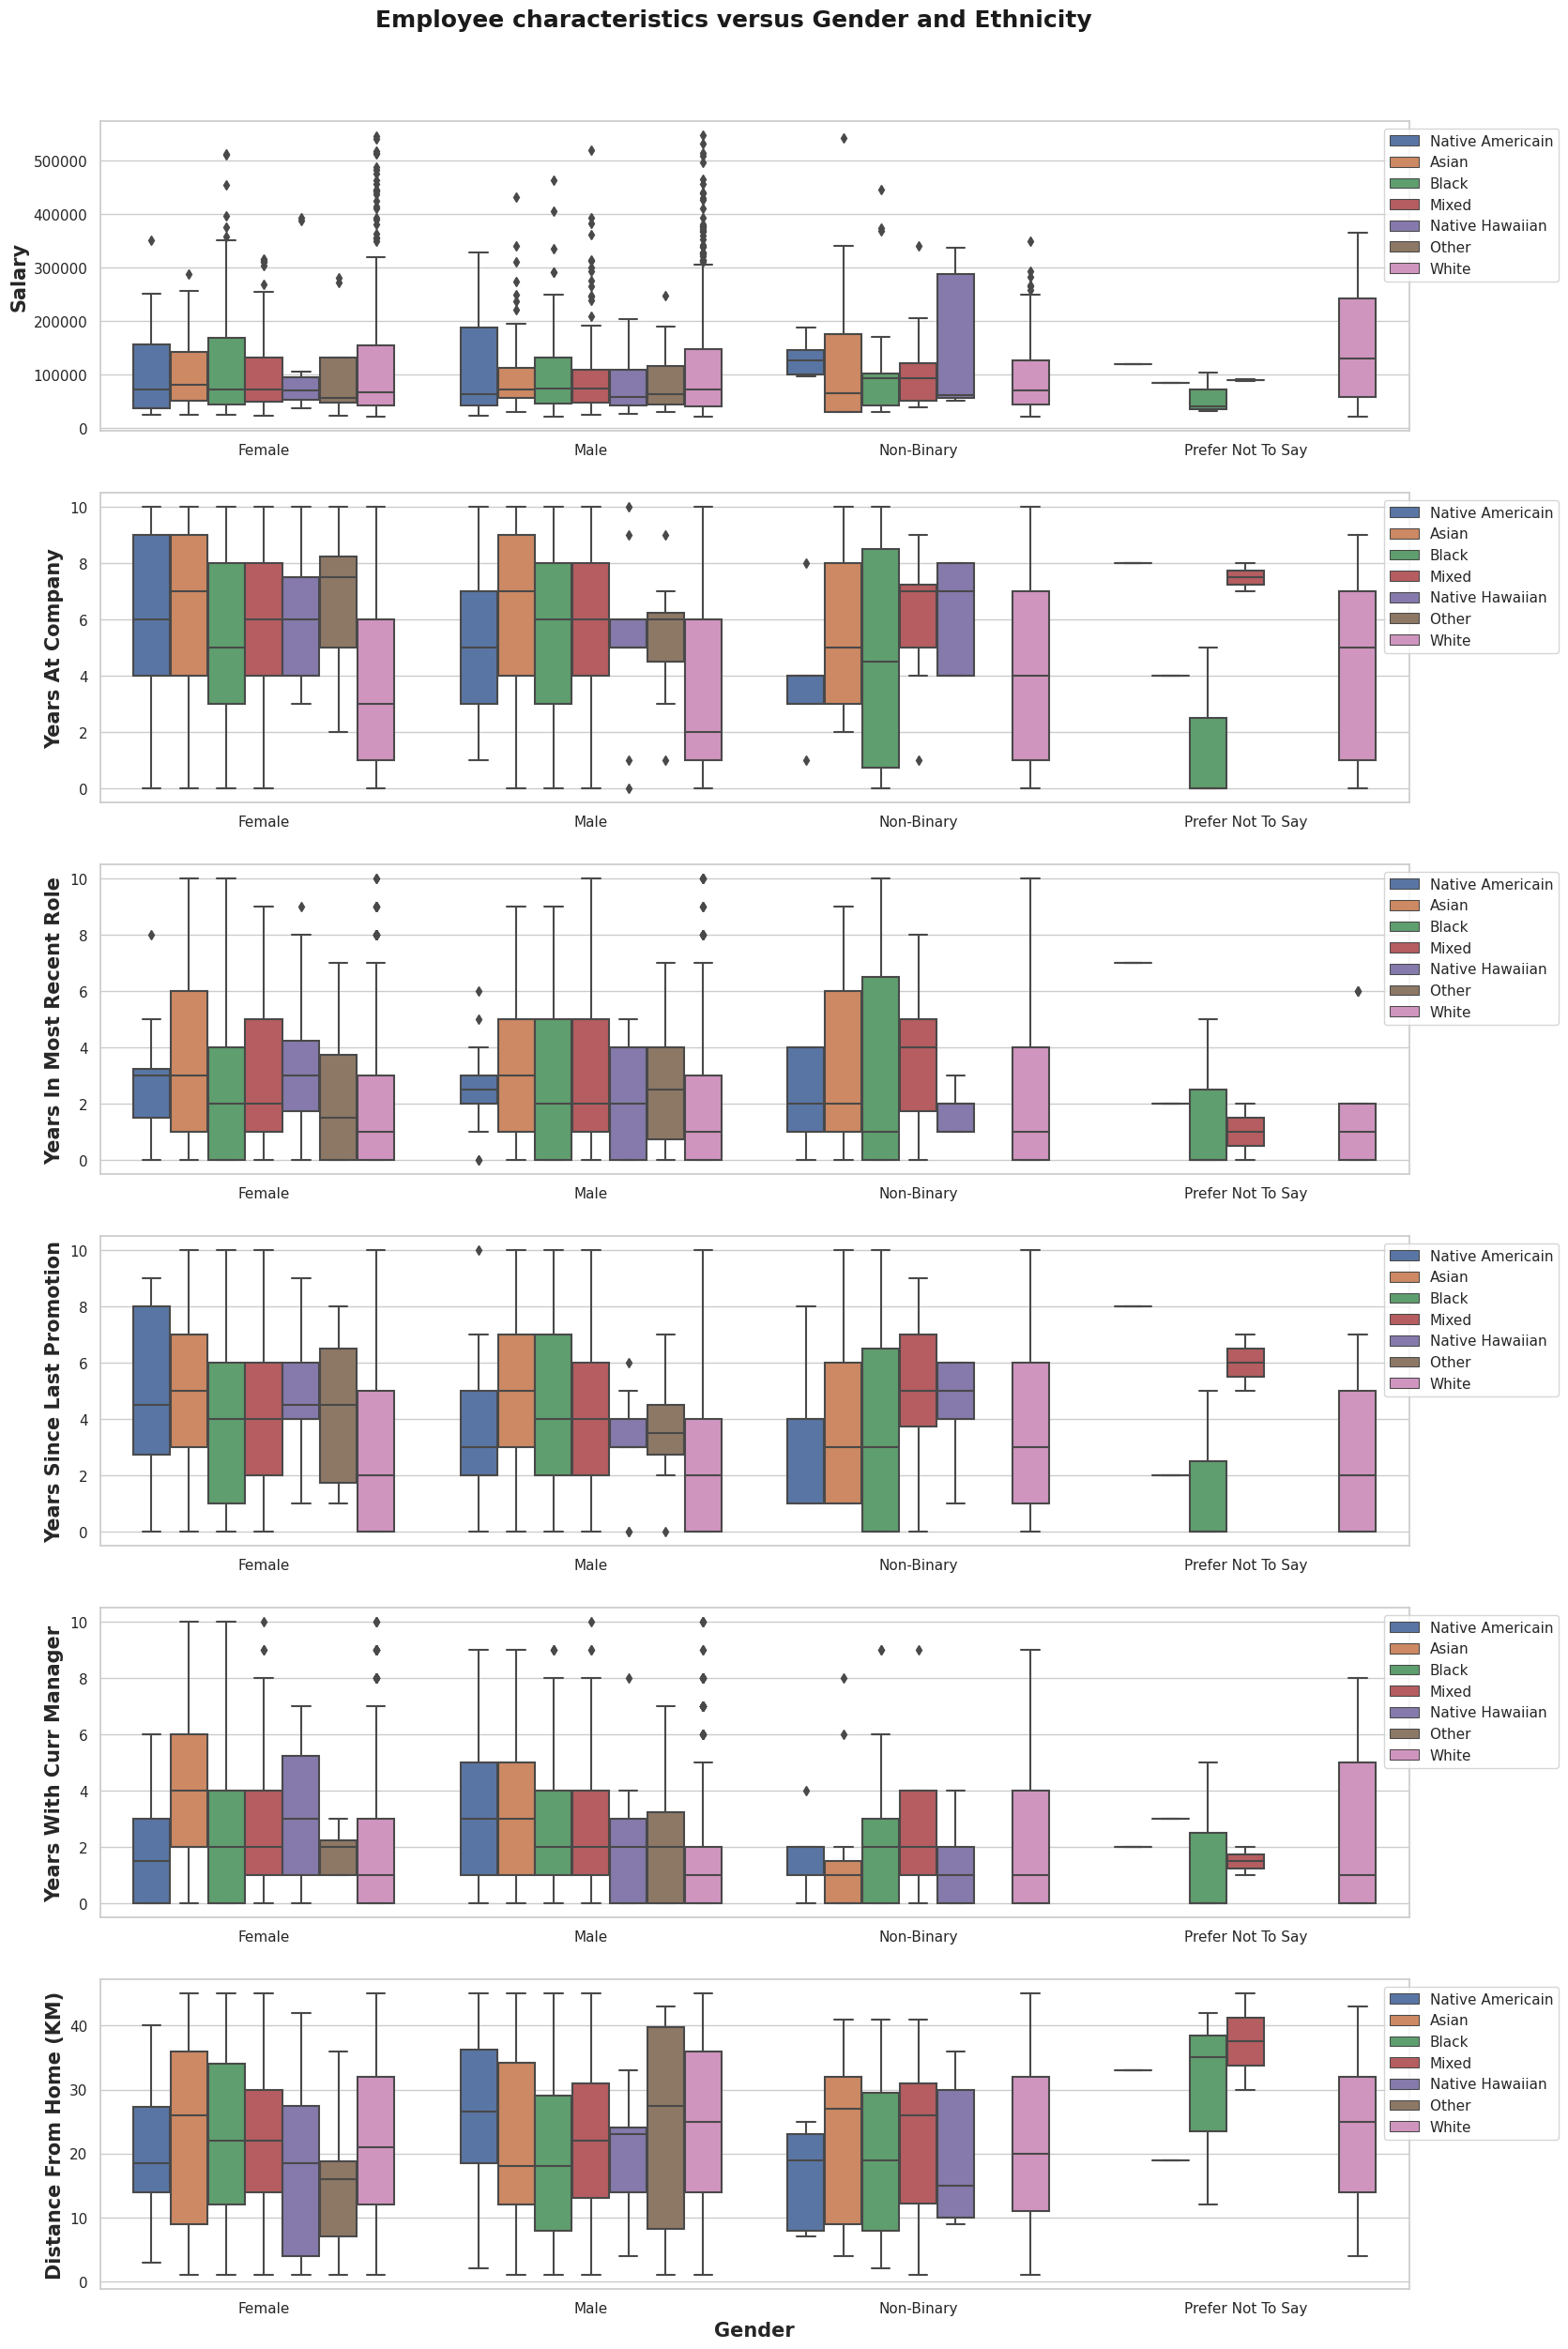

In [31]:
fig, axs = plt.subplots(6,1, figsize=(18,30))
plt.suptitle('Employee characteristics versus Gender and Ethnicity', ha='center', fontsize=18, fontweight='bold',color="k",y=0.92)
a = sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='Salary',ax=axs[0])
axs[0].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[0].set_ylabel('Salary',fontweight='bold')
axs[0].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsAtCompany',ax=axs[1])
axs[1].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[1].set_ylabel('Years At Company',fontweight='bold')
axs[1].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsInMostRecentRole',ax=axs[2])
axs[2].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[2].set_ylabel('Years In Most Recent Role',fontweight='bold')
axs[2].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsSinceLastPromotion',ax=axs[3])
axs[3].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[3].set_ylabel('Years Since Last Promotion',fontweight='bold')
axs[3].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsWithCurrManager',ax=axs[4])
axs[4].legend(loc='upper right', bbox_to_anchor=(1.12,1))
axs[4].set_ylabel('Years With Curr Manager',fontweight='bold')
axs[4].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='DistanceFromHome (KM)',ax=axs[5])
axs[5].legend(loc='upper right', bbox_to_anchor=(1.12,1))
axs[5].set_ylabel('Distance From Home (KM)',fontweight='bold')
axs[5].set_xlabel('Gender',fontweight='bold')

plt.show()

**The company seems to have been created by white people: longest year in the company and higest salaries.**

**It also seems that white people are more oten promoted...But maybe it is because they are the oldest employee... need to check that...**.

In [32]:
# Calculate year between being hired and promoted
df_employee['year_between_hired_a_promoted'] = df_employee['YearsAtCompany']-df_employee['YearsSinceLastPromotion']
df_employee['year_between_hired_a_promoted'].min()

0

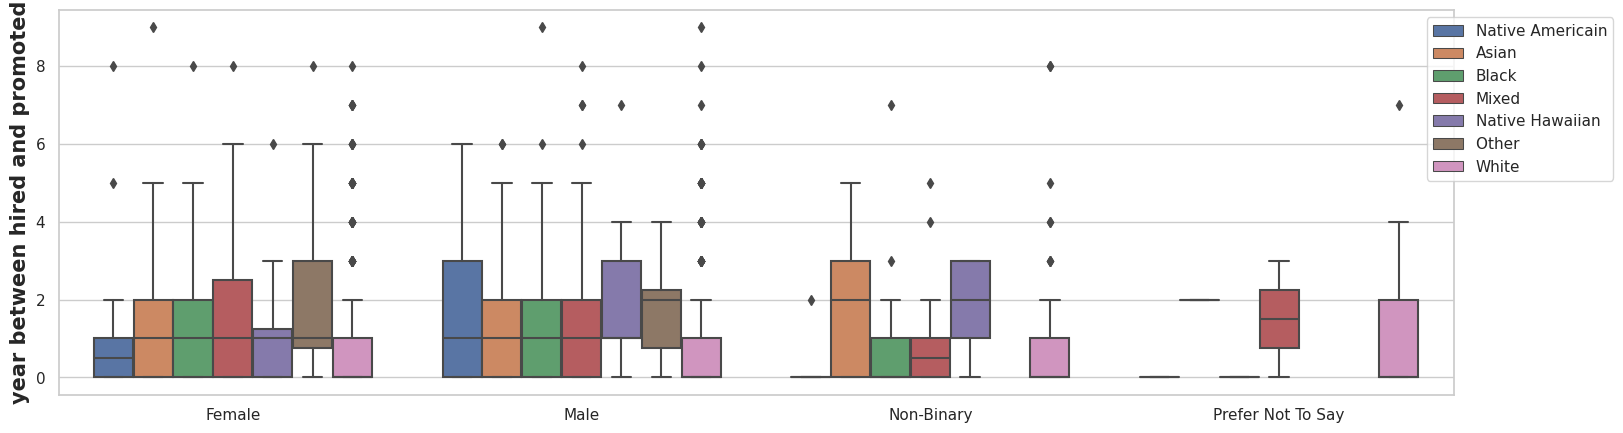

In [33]:
fig, axs = plt.subplots(figsize=(18,5))
a = sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='year_between_hired_a_promoted')
plt.legend(loc="upper right", bbox_to_anchor=(1.12,1))
plt.ylabel('year between hired and promoted',fontweight='bold')
plt.xlabel('')
plt.show()

**Ok so no. White peole are not promoted faster than the other.**

## <a id="2.2"></a>
## 2.2: How employees characteristic have evolve since 2012?

In [34]:
# first calculate when the employee left
df_employee['year_left'] = df_employee.apply(lambda x: x['HireDate'] + pd.DateOffset(years=x['YearsAtCompany']), axis=1)
# create dataframe with employee working during the selected year
df_employee_2012 = df_employee[(df_employee['HireDate'].dt.year<=2012)&(df_employee['year_left'].dt.year>2012)]
df_employee_2013 = df_employee[(df_employee['HireDate'].dt.year<=2013)&(df_employee['year_left'].dt.year>2013)]
df_employee_2014 = df_employee[(df_employee['HireDate'].dt.year<=2014)&(df_employee['year_left'].dt.year>2014)]
df_employee_2015 = df_employee[(df_employee['HireDate'].dt.year<=2015)&(df_employee['year_left'].dt.year>2015)]
df_employee_2016 = df_employee[(df_employee['HireDate'].dt.year<=2016)&(df_employee['year_left'].dt.year>2016)]
df_employee_2017 = df_employee[(df_employee['HireDate'].dt.year<=2017)&(df_employee['year_left'].dt.year>2017)]
df_employee_2018 = df_employee[(df_employee['HireDate'].dt.year<=2018)&(df_employee['year_left'].dt.year>2018)]
df_employee_2019 = df_employee[(df_employee['HireDate'].dt.year<=2019)&(df_employee['year_left'].dt.year>2019)]
df_employee_2020 = df_employee[(df_employee['HireDate'].dt.year<=2020)&(df_employee['year_left'].dt.year>2020)]
df_employee_2021 = df_employee[(df_employee['HireDate'].dt.year<=2021)&(df_employee['year_left'].dt.year>2021)]
df_employee_2022 = df_employee[(df_employee['HireDate'].dt.year<=2022)]
list_df_employee = [df_employee_2012,df_employee_2013,df_employee_2014,df_employee_2015,df_employee_2016,df_employee_2017,
                   df_employee_2018,df_employee_2019,df_employee_2020,df_employee_2021,df_employee_2022]

In [35]:
def extract_yearly_information(df):
    nb_employee = df.shape[0]
    # Count occurrences of each category in 'Category' column
    gender_counts = df['Gender'].value_counts()
    gender_counts_list = list(gender_counts.items())
    # Count occurrences of each category in 'Category' column
    Education_counts = df['Education'].value_counts()
    Education_counts_list = list(Education_counts.items())
    # Count occurrences of each category in 'Category' column
    Ethnicity_counts = df['Ethnicity'].value_counts()
    Ethnicity_counts_list = list(Ethnicity_counts.items())
    # Count occurrences of each category in 'Category' column
    Attrition_counts = df['Attrition'].value_counts()
    Attrition_counts_list = list(Attrition_counts.items())
    return nb_employee,gender_counts_list,Education_counts_list,Ethnicity_counts_list,Attrition_counts_list
    

nb_employee_2012,list_gender_2012,list_education_2012,list_ethnicity_2012,list_attrition_2012 = extract_yearly_information(df_employee_2012)
nb_employee_2013,list_gender_2013,list_education_2013,list_ethnicity_2013,list_attrition_2013 = extract_yearly_information(df_employee_2013)
nb_employee_2014,list_gender_2014,list_education_2014,list_ethnicity_2014,list_attrition_2014 = extract_yearly_information(df_employee_2014)
nb_employee_2015,list_gender_2015,list_education_2015,list_ethnicity_2015,list_attrition_2015 = extract_yearly_information(df_employee_2015)
nb_employee_2016,list_gender_2016,list_education_2016,list_ethnicity_2016,list_attrition_2016 = extract_yearly_information(df_employee_2016)
nb_employee_2017,list_gender_2017,list_education_2017,list_ethnicity_2017,list_attrition_2017 = extract_yearly_information(df_employee_2017)
nb_employee_2018,list_gender_2018,list_education_2018,list_ethnicity_2018,list_attrition_2018 = extract_yearly_information(df_employee_2018)
nb_employee_2019,list_gender_2019,list_education_2019,list_ethnicity_2019,list_attrition_2019 = extract_yearly_information(df_employee_2019)
nb_employee_2020,list_gender_2020,list_education_2020,list_ethnicity_2020,list_attrition_2020 = extract_yearly_information(df_employee_2020)
nb_employee_2021,list_gender_2021,list_education_2021,list_ethnicity_2021,list_attrition_2021 = extract_yearly_information(df_employee_2021)
nb_employee_2022,list_gender_2022,list_education_2022,list_ethnicity_2022,list_attrition_2022 = extract_yearly_information(df_employee_2022)

In [36]:
def prepare_df(column,list_var_2012,list_var_2013,list_var_2014,list_var_2015,list_var_2016,
               list_var_2017,list_var_2018,list_var_2019,list_var_2020,list_var_2021,list_var_2022):
    
    list_year = [year for year in range(2012, 2023)]
    
    df_variable_2012= pd.DataFrame(list_var_2012,columns=[column, 'count'])
    df_variable_2013= pd.DataFrame(list_var_2013,columns=[column, 'count'])
    df_variable_2014= pd.DataFrame(list_var_2014,columns=[column, 'count'])
    df_variable_2015= pd.DataFrame(list_var_2015,columns=[column, 'count'])
    df_variable_2016= pd.DataFrame(list_var_2016,columns=[column, 'count'])
    df_variable_2017= pd.DataFrame(list_var_2017,columns=[column, 'count'])
    df_variable_2018= pd.DataFrame(list_var_2018,columns=[column, 'count'])
    df_variable_2019= pd.DataFrame(list_var_2019,columns=[column, 'count'])
    df_variable_2020= pd.DataFrame(list_var_2020,columns=[column, 'count'])
    df_variable_2021= pd.DataFrame(list_var_2021,columns=[column, 'count'])
    df_variable_2022= pd.DataFrame(list_var_2022,columns=[column, 'count'])
    df_variable_2012 = df_variable_2012.set_index(column)
    df_variable_2013 = df_variable_2013.set_index(column)
    df_variable_2014 = df_variable_2014.set_index(column)
    df_variable_2015 = df_variable_2015.set_index(column)
    df_variable_2016 = df_variable_2016.set_index(column)
    df_variable_2017 = df_variable_2017.set_index(column)
    df_variable_2018 = df_variable_2018.set_index(column)
    df_variable_2019 = df_variable_2019.set_index(column)
    df_variable_2020 = df_variable_2020.set_index(column)
    df_variable_2021 = df_variable_2021.set_index(column)
    df_variable_2022 = df_variable_2022.set_index(column)

    df_variable_evolution = pd.concat([df_variable_2012,df_variable_2013,df_variable_2014,df_variable_2015,df_variable_2016,
                       df_variable_2017,df_variable_2018,df_variable_2019,df_variable_2020,df_variable_2021,df_variable_2022], axis=1)

    df_variable_evolution.columns = list_year
    df_variable_evolution=df_variable_evolution.T
    return  df_variable_evolution

In [37]:
df_gender_evolution =  prepare_df('Gender',list_gender_2012,list_gender_2013,list_gender_2014,list_gender_2015,list_gender_2016,
               list_gender_2017,list_gender_2018,list_gender_2019,list_gender_2020,list_gender_2021,list_gender_2022)
df_ethnicity_evolution =  prepare_df('Ethnicity',list_ethnicity_2012,list_ethnicity_2013,list_ethnicity_2014,list_ethnicity_2015,list_ethnicity_2016,
               list_ethnicity_2017,list_ethnicity_2018,list_ethnicity_2019,list_ethnicity_2020,list_ethnicity_2021,list_ethnicity_2022)
df_education_evolution =  prepare_df('Education',list_education_2012,list_education_2013,list_education_2014,list_education_2015,list_education_2016,
               list_education_2017,list_education_2018,list_education_2019,list_education_2020,list_education_2021,list_education_2022)
df_attrition_evolution =  prepare_df('attrition',list_attrition_2012,list_attrition_2013,list_attrition_2014,list_attrition_2015,list_attrition_2016,
               list_attrition_2017,list_attrition_2018,list_attrition_2019,list_attrition_2020,list_attrition_2021,list_attrition_2022)

In [38]:
list_year = [year for year in range(2012, 2023)]
list_nb_employee = [nb_employee_2012,nb_employee_2013,nb_employee_2014,nb_employee_2015,nb_employee_2016,nb_employee_2017,
nb_employee_2018,nb_employee_2019,nb_employee_2020,nb_employee_2021,nb_employee_2022]

df_nb_employee = pd.DataFrame(list(zip(list_year, list_nb_employee)), columns=['year', 'nb_employee'])
df_nb_employee = df_nb_employee.set_index("year")


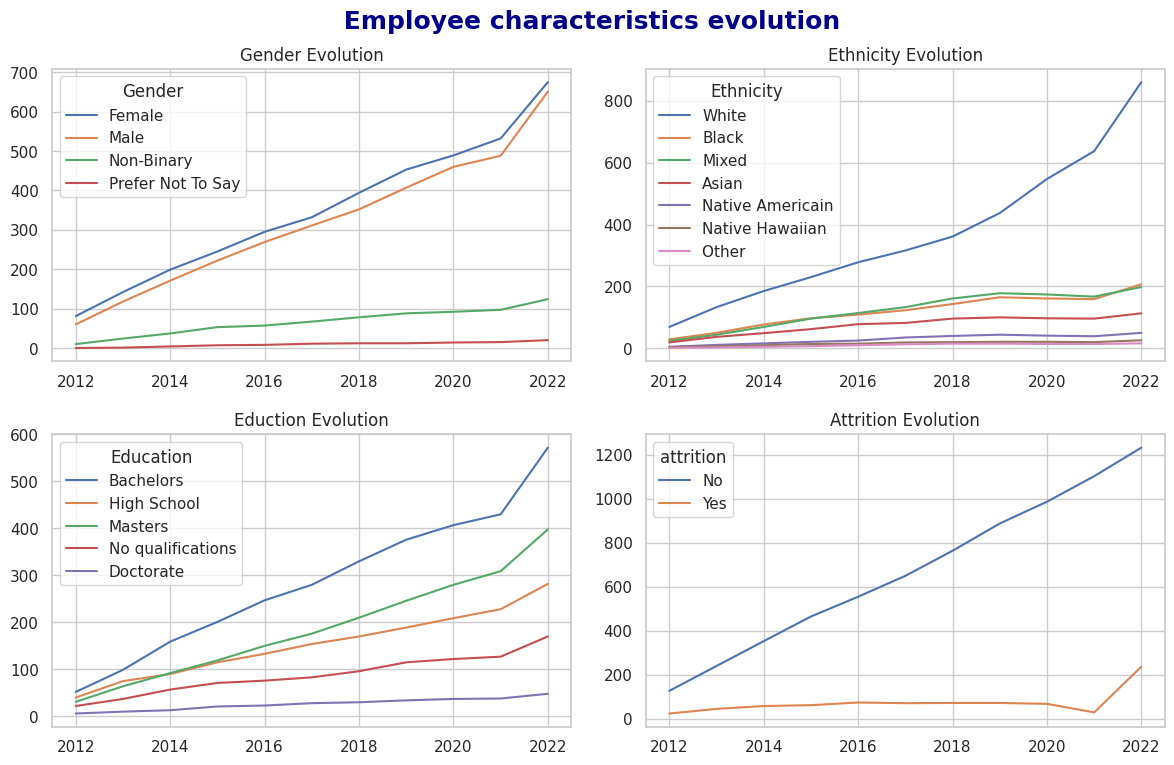

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot data on each subplot
plt.suptitle(' Employee characteristics evolution', ha='center', fontsize=18, fontweight='bold',color='darkblue',y=0.96)
df_gender_evolution.plot(ax=axs[0, 0], title='Gender Evolution')
df_ethnicity_evolution.plot(ax=axs[0, 1], title='Ethnicity Evolution')
df_education_evolution.plot(ax=axs[1, 0], title='Eduction Evolution')
df_attrition_evolution.plot(ax=axs[1, 1], title='Attrition Evolution')


plt.tight_layout()
plt.show()

**CONCLUSION**
- we did not observed any inequality between man and woman in therms of role, salary or background. 
- they are more white people (almost half of the company),but it is less that the percentage of white people living in the US (61.6%). 
- White people have also the highest salaries, but it seems the company was created by them.
- Most of the employee live in California, where the 40% of the population is Latinos. This ethnic group is not represented, in California latinos are mostly gardener, farm worker or construction worker... 


## <a id="2.2"></a>
## 2.2: When are performed the performance reviews?

In [40]:
df_employee.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'year_between_hired_a_promoted', 'year_left'],
      dtype='object')

In [41]:
### calculate nb of employee per months
# Extract Year and Month of review
df_employee['HireDate'] = df_employee['HireDate'].dt.to_period('M')
# Count the Number of Dates per Month
nb_employee_per_month = df_employee.groupby('HireDate').size()

### calculate nb of review per months
# Extract Year and Month of review
df_performance['review_Y_M'] = df_performance['ReviewDate'].dt.to_period('M')
# Count the Number of Dates per Month
nb_review_per_month = df_performance.groupby('review_Y_M').size()

## merge two series
df_count_review   = pd.DataFrame({'Month':nb_review_per_month.index, 'count_review':nb_review_per_month.values})
df_count_employee = pd.DataFrame({'Month':nb_employee_per_month.index, 'count_employee':nb_employee_per_month.values})
df_count_review   = df_count_review.set_index('Month')
df_count_employee = df_count_employee.set_index('Month')
df_count_employee['cum_nb_employee'] = df_count_employee['count_employee'].cumsum()
df_count_employee.head(2)

,count_employee,cum_nb_employee
Month,,
2012-01,33,33
2012-02,29,62


In [42]:
# Step 1: Combine the indexes of both DataFrames
all_dates = df_count_employee.index.union(df_count_review.index)

# Step 2: Reindex both DataFrames to include all dates
df_count_review = df_count_review.reindex(all_dates)
df_count_employee = df_count_employee.reindex(all_dates)

# Step 3: Merge the DataFrames
df_count = pd.concat([df_count_review, df_count_employee], axis=1).fillna(0)

# Ensure 'Month' is a string (for x-axis)
df_count = df_count.reset_index()
df_count['Month'] = df_count['Month'].dt.strftime('%Y-%m')

df_count.head(2)

,Month,count_review,count_employee,cum_nb_employee
0,2012-01,0.0,33,33
1,2012-02,0.0,29,62


In [43]:
df_count['Month'].idxmax()

124

In [44]:
df_count.loc[124]

Month              2022-12
count_review          85.0
count_employee          13
cum_nb_employee       1470
Name: 124, dtype: object

Perfromance review are performed all over the year but mostly at the end and beginning of the year (max in December).

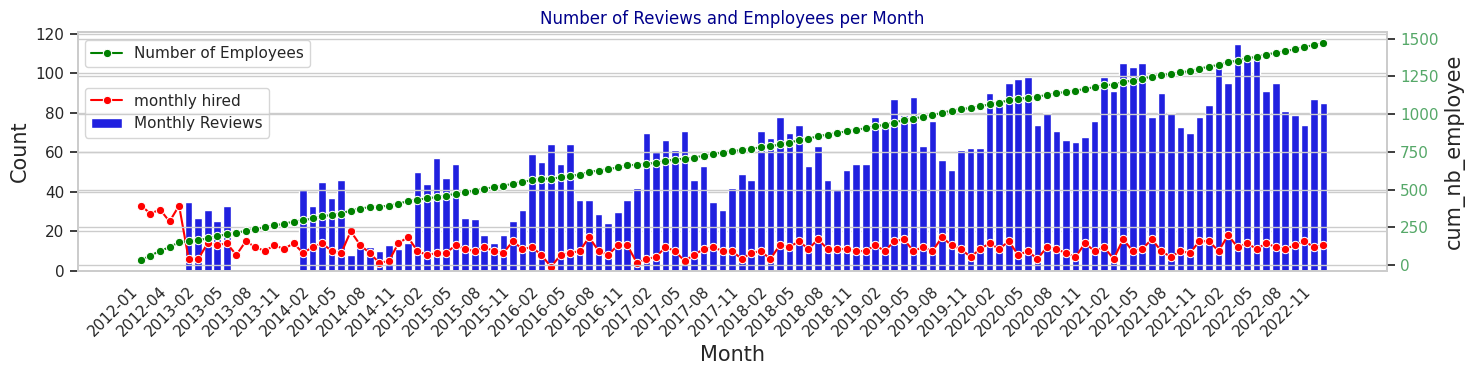

In [45]:
fig, ax = plt.subplots(figsize=(15, 4))

# Plot bar plot with Seaborn
sns.barplot(x=df_count.index, y='count_review', data=df_count, color='blue', ax=ax, label='Monthly Reviews')

# Plot line plot with Seaborn
sns.lineplot(x=df_count.index, y='count_employee', data=df_count, marker='o', color='red', ax=ax, label='monthly hired')
ax2 = ax.twinx()
sns.lineplot(x=df_count.index, y='cum_nb_employee', data=df_count, marker='o', color='green', ax=ax2, label='Number of Employees')


# Adding title and labels
ax.set_title('Number of Reviews and Employees per Month',color='darkblue')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

# Customize x-axis to show only every 3 months
xticks_labels = df_count['Month'].unique()
every_n_months = 3
ax.set_xticks(range(0, len(xticks_labels), every_n_months))
ax.set_xticklabels(xticks_labels[::every_n_months], rotation=45, ha='right')

# Add legends
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.8))

# Display the plot
ax2.tick_params(axis='y', labelcolor='g')
plt.legend()
plt.tight_layout()
plt.show()

## <a id="2.3"></a>
## 2.3: What think the emloyees of their review?

In [46]:
df_rating = df_performance[['EnvironmentSatisfaction','JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken','WorkLifeBalance', 'SelfRating', 'ManagerRating']]

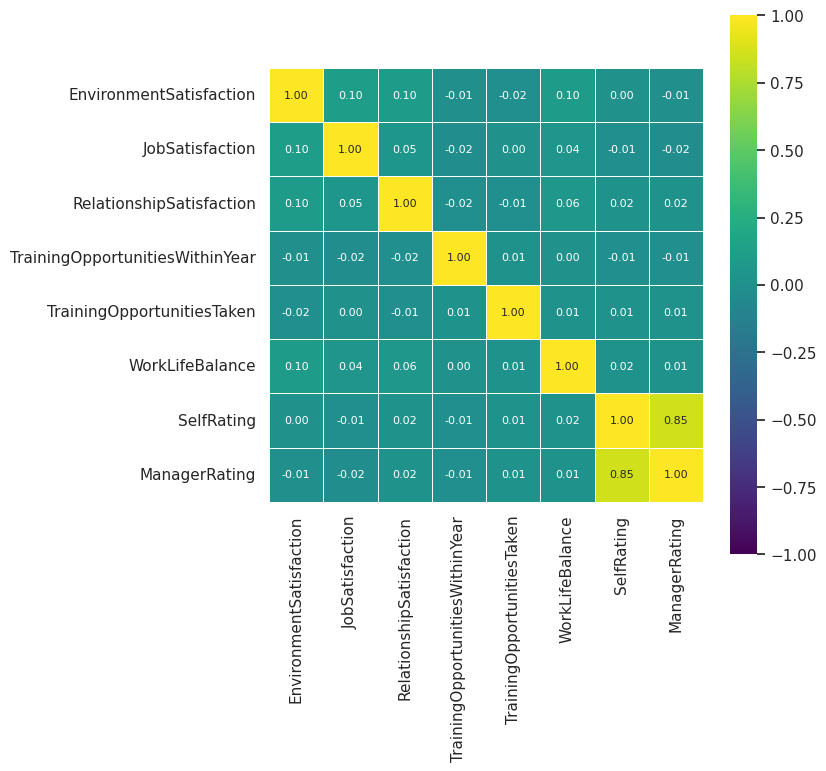

In [47]:
corr_matrix  = df_rating.corr(method='pearson')  

plt.figure(figsize=(7, 7))
annot_kws={"size": 8}
sns.heatmap(corr_matrix, annot=True, fmt=".2f",linewidths=.5,annot_kws=annot_kws,square=True,cmap = 'viridis', vmin = -1, vmax = 1, center = 0)
plt.show()

**Over the years, there is a good coorelation between self and manager review.** 

**But how does it evolve with time?**

In [48]:
# Extract Year and Month of review
df_performance['review_Y'] = df_performance['ReviewDate'].dt.to_period('Y')

# create df_performance_per_year
df_performance_2013 = df_performance[df_performance['review_Y']=='2013']
df_performance_2014 = df_performance[df_performance['review_Y']=='2014']
df_performance_2015 = df_performance[df_performance['review_Y']=='2015']
df_performance_2016 = df_performance[df_performance['review_Y']=='2016']
df_performance_2017 = df_performance[df_performance['review_Y']=='2017']
df_performance_2018 = df_performance[df_performance['review_Y']=='2018']
df_performance_2019 = df_performance[df_performance['review_Y']=='2019']
df_performance_2020 = df_performance[df_performance['review_Y']=='2020']
df_performance_2021 = df_performance[df_performance['review_Y']=='2021']
df_performance_2022 = df_performance[df_performance['review_Y']=='2022']
df_performance_2023 = df_performance[df_performance['review_Y']=='2023']
df_performance_2024 = df_performance[df_performance['review_Y']=='2024']

In [49]:
# merge performance and employee df:
df_2013 = pd.merge(df_performance_2013,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2014 = pd.merge(df_performance_2014,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2015 = pd.merge(df_performance_2015,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2016 = pd.merge(df_performance_2016,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2017 = pd.merge(df_performance_2017,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2018 = pd.merge(df_performance_2018,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2019 = pd.merge(df_performance_2019,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2020 = pd.merge(df_performance_2020,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2021 = pd.merge(df_performance_2021,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2022 = pd.merge(df_performance_2022,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])

In [50]:
# select man and female
df_2013_m = df_2013[df_2013['Gender']=='Male']
df_2014_m = df_2014[df_2014['Gender']=='Male']
df_2015_m = df_2015[df_2015['Gender']=='Male']
df_2016_m = df_2016[df_2016['Gender']=='Male']
df_2017_m = df_2017[df_2017['Gender']=='Male']
df_2018_m = df_2018[df_2018['Gender']=='Male']
df_2019_m = df_2019[df_2019['Gender']=='Male']
df_2020_m = df_2020[df_2020['Gender']=='Male']
df_2021_m = df_2021[df_2021['Gender']=='Male']
df_2022_m = df_2022[df_2022['Gender']=='Male']

df_2013_f = df_2013[df_2013['Gender']=='Female']
df_2014_f = df_2014[df_2014['Gender']=='Female']
df_2015_f = df_2015[df_2015['Gender']=='Female']
df_2016_f = df_2016[df_2016['Gender']=='Female']
df_2017_f = df_2017[df_2017['Gender']=='Female']
df_2018_f = df_2018[df_2018['Gender']=='Female']
df_2019_f = df_2019[df_2019['Gender']=='Female']
df_2020_f = df_2020[df_2020['Gender']=='Female']
df_2021_f = df_2021[df_2021['Gender']=='Female']
df_2022_f = df_2022[df_2022['Gender']=='Female']

In [51]:
# list df:
list_df=[df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022]
list_df_m = [df_2013_m,df_2014_m,df_2015_m,df_2016_m,df_2017_m,df_2018_m,df_2019_m,df_2020_m,df_2021_m,df_2022_m]
list_df_f = [df_2013_f,df_2014_f,df_2015_f,df_2016_f,df_2017_f,df_2018_f,df_2019_f,df_2020_f,df_2021_f,df_2022_f]

# create list with year
list_year = [year for year in range(2013, 2023)]
list_corr =[]
list_corr_male =[]
list_corr_female =[]

# calculate correlation between Manager and self Rating
def calcul_corr(df,list_corr):
    correlation = df['ManagerRating'].corr(df['SelfRating'])
    list_corr.append(correlation)
    
for df in list_df:
    calcul_corr(df,list_corr)

for df in list_df_m:
    calcul_corr(df,list_corr_male)

for df in list_df_f:
    calcul_corr(df,list_corr_female)
       
# calculate ratio between Manager and self Rating
def calcul_ratio(df):
    df['ratio'] = df['ManagerRating']/df['SelfRating']

for df in list_df:
    calcul_ratio(df)
    
# merge and plot result
dict = {'Year': list_year, 'corr M+F': list_corr, 'corr M': list_corr_male,'corr F': list_corr_female} 
df_corr = pd.DataFrame(dict)

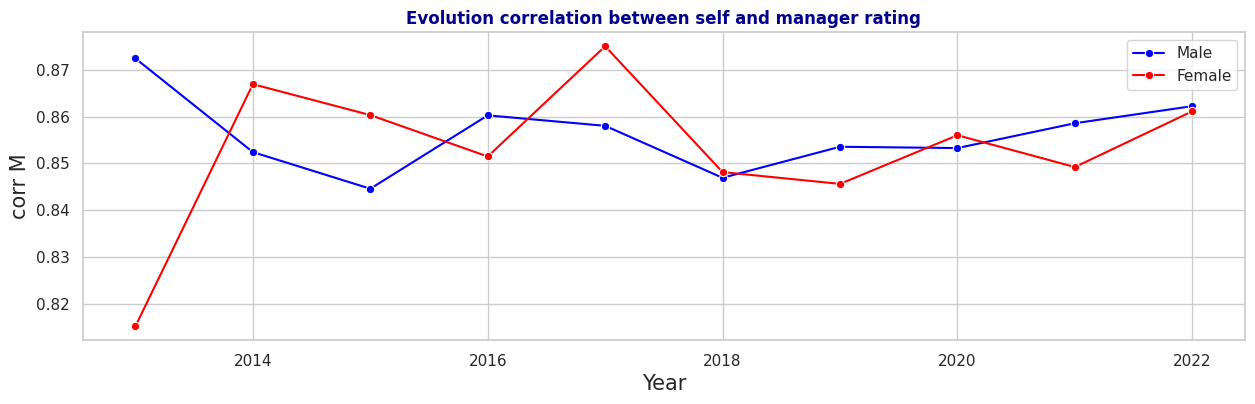

In [52]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='Year', y='corr M', data=df_corr, color='blue', ax=ax, label='Male',marker='o',)
sns.lineplot(x='Year', y='corr F', data=df_corr, color='red', ax=ax, label='Female',marker='o',)
ax.set_title('Evolution correlation between self and manager rating',fontweight='bold',color='darkblue')
# ax.set_xlabel('Month')
# ax.set_ylabel('Count')
plt.show()

**Over the year the discrepency between male and female decreased. Since 2018, the correlations are very closed and keep increasing. But are they really in goog agremenet?**

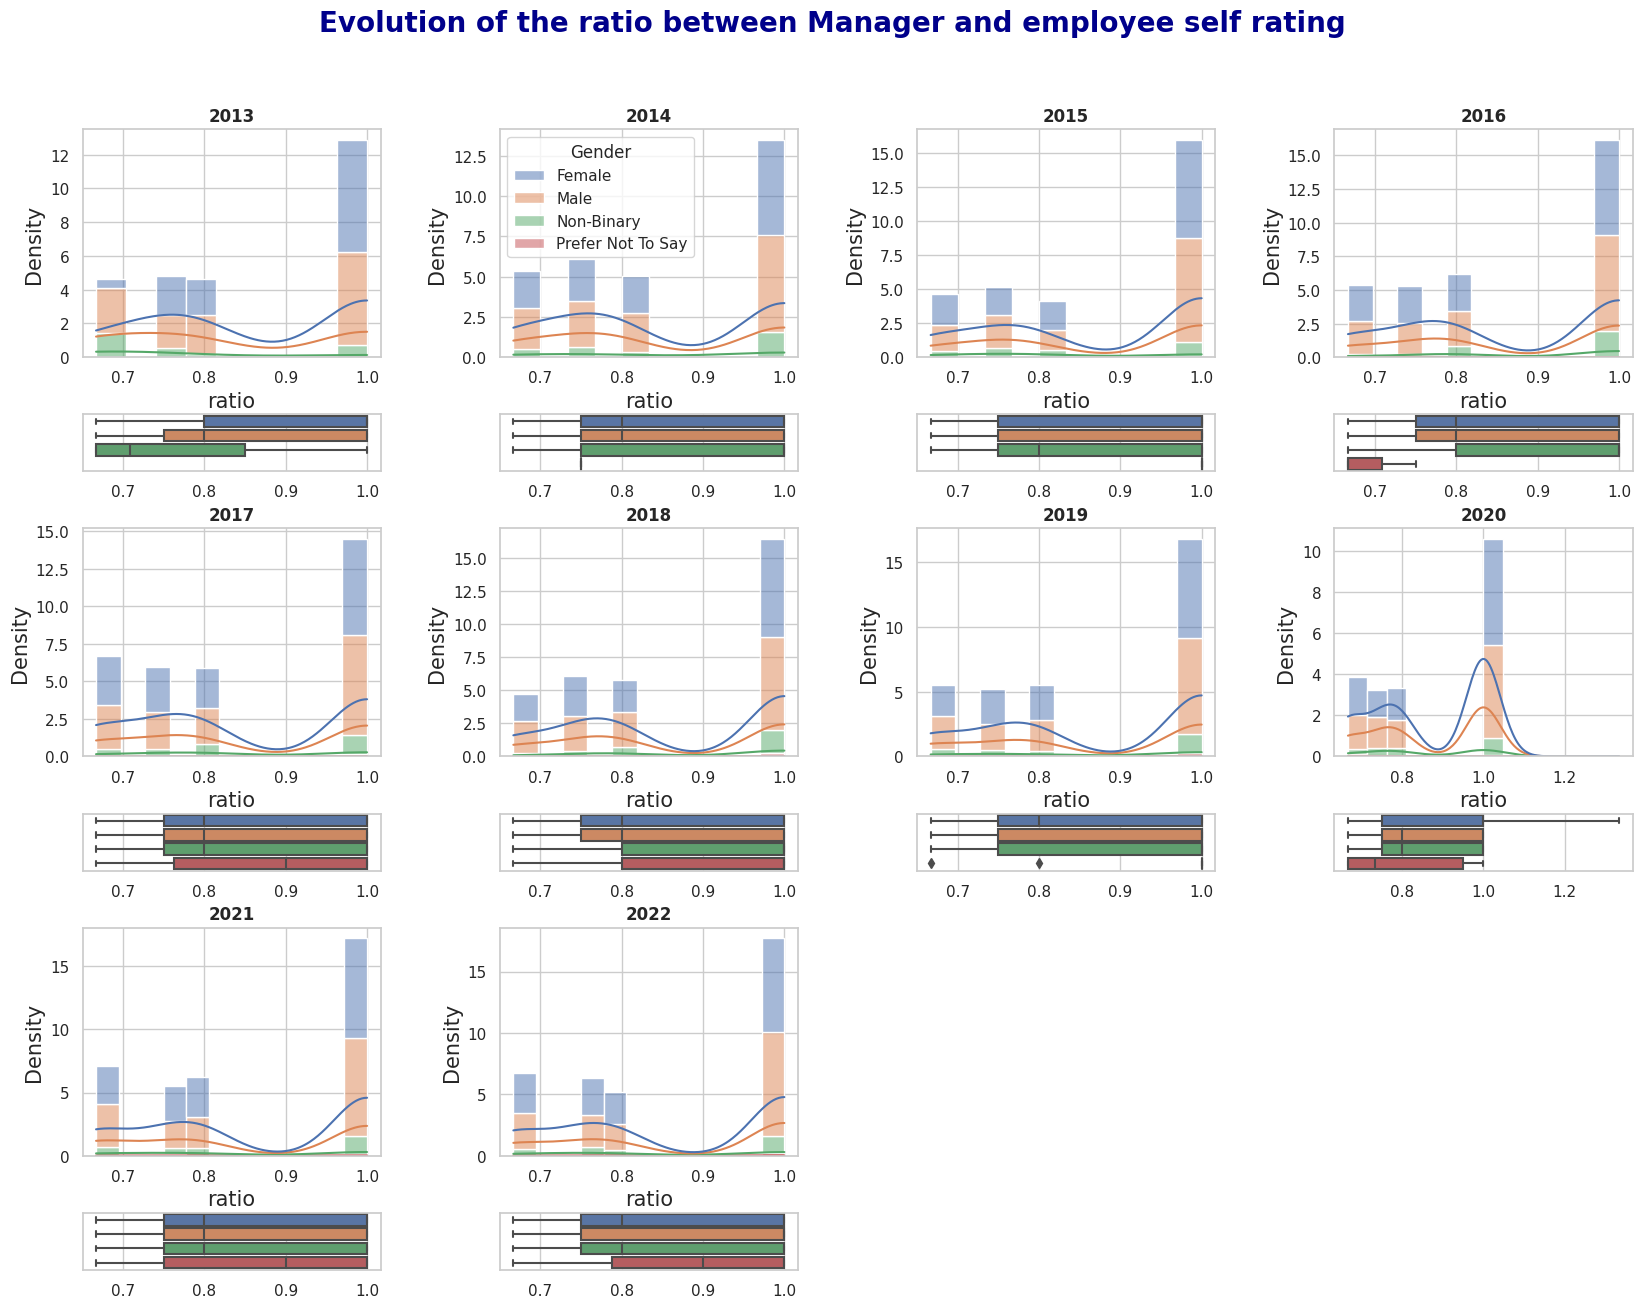

In [53]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Define the grid specification: 8 rows (4 rows for density plots, 4 rows for boxplots)
gs = GridSpec(8, 4, figure=fig, height_ratios=[4, 1] * 4)

# Density plot (Histogram with KDE)
plt.suptitle("Evolution of the ratio between Manager and employee self rating"
             , ha='center', fontsize=20, fontweight='bold',color='darkblue',y=0.94)
ax_density = fig.add_subplot(gs[0, 0])
sns.histplot(data=df_2013, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2013',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 0])
sns.boxplot(data=df_2013, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])  

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[0, 1])
sns.histplot(data=df_2014, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density')
ax_density.set_title('2014',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 1])
sns.boxplot(data=df_2014, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[0, 2])
sns.histplot(data=df_2015, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2015',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 2])
sns.boxplot(data=df_2015, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[0, 3])
sns.histplot(data=df_2016, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2016',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 3])
sns.boxplot(data=df_2016, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 0])
sns.histplot(data=df_2017, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2017',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 0])
sns.boxplot(data=df_2017, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 1])
sns.histplot(data=df_2018, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2018',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 1])
sns.boxplot(data=df_2018, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 2])
sns.histplot(data=df_2019, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2019',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 2])
sns.boxplot(data=df_2019, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 3])
sns.histplot(data=df_2020, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2020',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 3])
sns.boxplot(data=df_2020, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[4, 0])
sns.histplot(data=df_2021, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2021',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[5, 0])
sns.boxplot(data=df_2021, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[4, 1])
sns.histplot(data=df_2022, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2022',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[5, 1])
sns.boxplot(data=df_2022, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])

plt.show()


## <a id="2.4"></a>
## 2.4: What are the factors influncing the performance
### 2.4.1 : model selection

In [54]:
def build_classifier(df, target, classifier, test_size=0.2, random_state=42):
    # Keep only numerical and categorical variables
    df = df.select_dtypes(include=['number', 'category'])
    df =  df.drop(columns=['ratio'])
    
    # Convert categorical variables to dummy/indicator variables
    df = pd.get_dummies(df, drop_first=True)
    
    # Separate features and target
    X = df.drop(columns=[target])
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=test_size, random_state=random_state)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

     # Build and train the classifier model
    model = classifier
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Check if the classifier has feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X.columns

        # Create a DataFrame for visualization
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
    
    return feature_importance_df.head(6)

In [55]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = build_classifier(df_2018, target='ManagerRating', classifier=DecisionTreeClassifier(random_state=42))

Accuracy: 0.5448

Classification Report:
              precision    recall  f1-score   support

           2       0.52      0.57      0.55        21
           3       0.61      0.54      0.57        52
           4       0.50      0.46      0.48        46
           5       0.53      0.69      0.60        26

    accuracy                           0.54       145
   macro avg       0.54      0.56      0.55       145
weighted avg       0.55      0.54      0.54       145



In [56]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = build_classifier(df_2018, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))

Accuracy: 0.5655

Classification Report:
              precision    recall  f1-score   support

           2       0.62      0.24      0.34        21
           3       0.61      0.87      0.71        52
           4       0.52      0.59      0.55        46
           5       0.45      0.19      0.27        26

    accuracy                           0.57       145
   macro avg       0.55      0.47      0.47       145
weighted avg       0.55      0.57      0.53       145



In [57]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = build_classifier(df_2018, target='ManagerRating', classifier=GradientBoostingClassifier(random_state=42))

Accuracy: 0.6276

Classification Report:
              precision    recall  f1-score   support

           2       0.61      0.81      0.69        21
           3       0.72      0.60      0.65        52
           4       0.57      0.63      0.60        46
           5       0.61      0.54      0.57        26

    accuracy                           0.63       145
   macro avg       0.63      0.64      0.63       145
weighted avg       0.64      0.63      0.63       145



In [58]:
import lightgbm as lgb
model_lgb = build_classifier(df_2018, target='ManagerRating', classifier=lgb.LGBMClassifier(random_state=42,verbose=-1, verbosity=-1))

Accuracy: 0.5931

Classification Report:
              precision    recall  f1-score   support

           2       0.43      0.48      0.45        21
           3       0.60      0.62      0.61        52
           4       0.62      0.63      0.62        46
           5       0.68      0.58      0.62        26

    accuracy                           0.59       145
   macro avg       0.58      0.57      0.58       145
weighted avg       0.60      0.59      0.59       145



In [59]:
model_rfc_2013 = build_classifier(df_2013, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2014 = build_classifier(df_2014, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2015 = build_classifier(df_2015, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2016 = build_classifier(df_2016, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2017 = build_classifier(df_2017, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2018 = build_classifier(df_2018, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2019 = build_classifier(df_2019, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2020 = build_classifier(df_2020, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2021 = build_classifier(df_2021, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2022 = build_classifier(df_2022, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))


Accuracy: 0.5484

Classification Report:
              precision    recall  f1-score   support

           2       0.75      0.60      0.67         5
           3       0.54      0.64      0.58        11
           4       0.46      0.60      0.52        10
           5       1.00      0.20      0.33         5

    accuracy                           0.55        31
   macro avg       0.69      0.51      0.53        31
weighted avg       0.62      0.55      0.54        31

Accuracy: 0.4561

Classification Report:
              precision    recall  f1-score   support

           2       0.33      0.10      0.15        10
           3       0.47      0.75      0.58        20
           4       0.42      0.44      0.43        18
           5       0.67      0.22      0.33         9

    accuracy                           0.46        57
   macro avg       0.47      0.38      0.37        57
weighted avg       0.46      0.46      0.42        57

Accuracy: 0.4217

Classification Report:
       

## <a id="2.4.2"></a>
### 2.4.2 : Feature importance

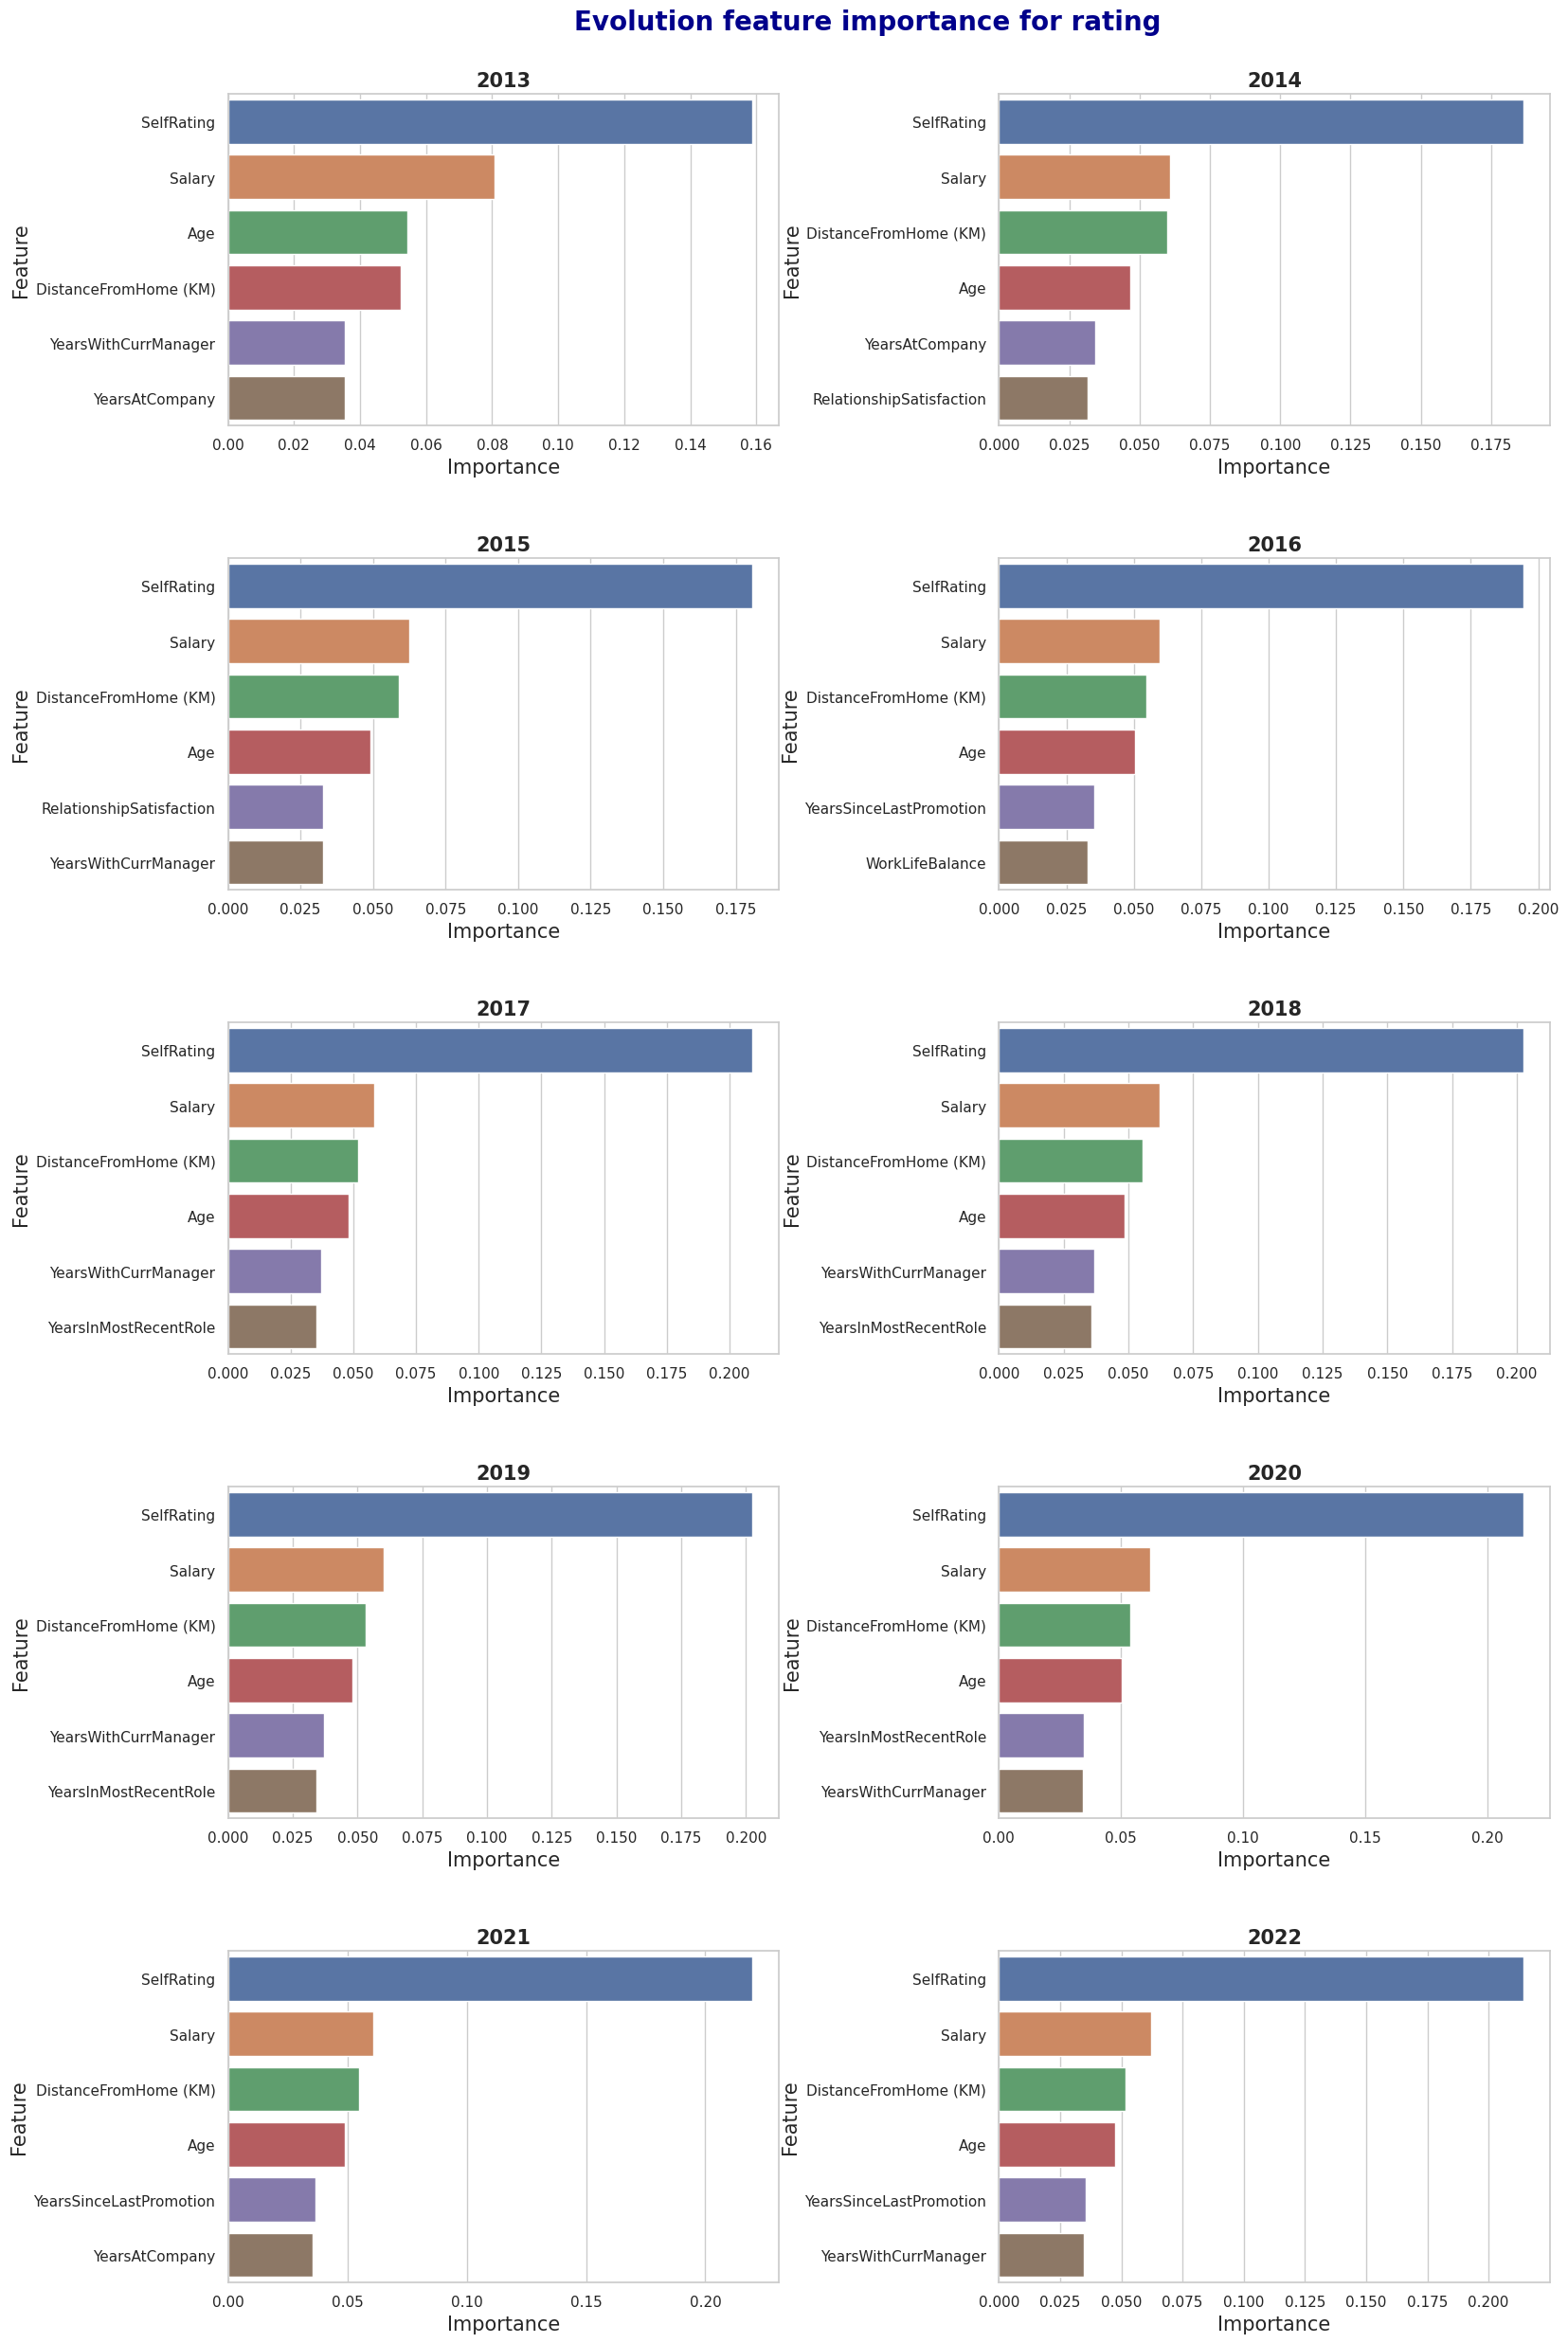

In [60]:
# Plot the feature importance
fig, axs = plt.subplots(5,2, figsize=(18,30))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Evolution feature importance for rating', ha='center',
             fontsize=20, fontweight='bold',color='darkblue',y=0.91)
sns.barplot(x='Importance', y='Feature', data=model_rfc_2013,ax=axs[0,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2014,ax=axs[0,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2015,ax=axs[1,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2016,ax=axs[1,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2017,ax=axs[2,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2018,ax=axs[2,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2019,ax=axs[3,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2020,ax=axs[3,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2021,ax=axs[4,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2022,ax=axs[4,1])

axs[0,0].set_title('2013', ha='center',fontsize=15, fontweight='bold')
axs[0,1].set_title('2014', ha='center',fontsize=15, fontweight='bold')
axs[1,0].set_title('2015', ha='center',fontsize=15, fontweight='bold')
axs[1,1].set_title('2016', ha='center',fontsize=15, fontweight='bold')
axs[2,0].set_title('2017', ha='center',fontsize=15, fontweight='bold')
axs[2,1].set_title('2018', ha='center',fontsize=15, fontweight='bold')
axs[3,0].set_title('2019', ha='center',fontsize=15, fontweight='bold')
axs[3,1].set_title('2020', ha='center',fontsize=15, fontweight='bold')
axs[4,0].set_title('2021', ha='center',fontsize=15, fontweight='bold')
axs[4,1].set_title('2022', ha='center',fontsize=15, fontweight='bold')
plt.show()

**The manager rating is mostly influenced by employee's:**
- **salary**, 
- **distance from home**,
- **age**,
- **and year with the company and manager.**

## <a id="2.5"></a>
## 2.5: Who is promoted?
### 2.5.1:Sankey Diagram

In [61]:
df_merged2 = df_merged[df_merged['EmployeeID'] != 'wrongID']
df_merged2.head(2)

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,PR07,9E7A-1F70,2013-01-08,3,4,5,2,1,5,4,...,Single,129356,0,No,2012-05-02,Yes,5,1,1,2
11,PR1000,528C-3E0D,2016-03-16,4,4,2,2,2,4,5,...,Married,42045,0,Yes,2013-10-15,Yes,6,0,3,3


In [62]:
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(1, 'Unacceptable')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(2, 'Needs Improvement')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(3, 'Meets Expectation')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(4, 'Exceeds Expectation')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(5, 'Above and Beyond')

/tmp/ipykernel_17/1242812076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(1, 'Unacceptable')
/tmp/ipykernel_17/1242812076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(2, 'Needs Improvement')
/tmp/ipykernel_17/1242812076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [63]:
def graph(col1):
    # Assuming df_merged2 exists and has the required columns
    # Group data and reset index to prepare for Sankey diagram
    df1 = df_merged2.groupby([col1, 'ManagerRating'], observed=True).size().reset_index(name='count')
    df2 = df_merged2.groupby(['ManagerRating', 'Attrition'], observed=True).size().reset_index(name='count')
    df3 = df_merged2.groupby(['Attrition', 'YearsSinceLastPromotion'], observed=True).size().reset_index(name='count')

    # Extract unique categories for labeling and ensure they are unique and clean
    unique_Ethnicity = df1[col1].unique().tolist()
    unique_ManagerRating = df1['ManagerRating'].unique().tolist()
    unique_Attrition = df2['Attrition'].unique().tolist()
    unique_YearsSinceLastPromotion = df3['YearsSinceLastPromotion'].unique().tolist()

    # Combine all labels and ensure they are strings and trimmed of whitespace
    labels = list(set([str(label).strip() for label in unique_Ethnicity + unique_ManagerRating + unique_Attrition + unique_YearsSinceLastPromotion]))

    # Map labels to indices for Sankey nodes
    label_to_index = {label: idx for idx, label in enumerate(labels)}

    # Initialize lists for Sankey source, target, and value
    source = []
    target = []
    value = []

    # Populate lists with data for each flow
    for _, row in df1.iterrows():
        source.append(label_to_index[str(row[col1]).strip()])
        target.append(label_to_index[str(row['ManagerRating']).strip()])
        value.append(row['count'])

    for _, row in df2.iterrows():
        source.append(label_to_index[str(row['ManagerRating']).strip()])
        target.append(label_to_index[str(row['Attrition']).strip()])
        value.append(row['count'])

    for _, row in df3.iterrows():
        source.append(label_to_index[str(row['Attrition']).strip()])
        target.append(label_to_index[str(row['YearsSinceLastPromotion']).strip()])
        value.append(row['count'])

    # Build and display the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node={
            'pad': 15,
            'thickness': 20,
            'line': {'color': "black", 'width': 0.5},
            'label': labels
        },
        link={
            'source': source,
            'target': target,
            'value': value
        }
    )])

    fig.update_layout(title_text="Sankey Diagram: {} / ManagerRating / Attrition / YearsSinceLastPromotion".format(col1), font_size=10)
    fig.show()


In [64]:
graph("Gender")

In [65]:
graph("Ethnicity")

In [66]:
graph("JobRole")